In [1]:
import dataset_utils as datasets
import torch
import torchvision.transforms.v2 as transforms

In [2]:
dataset_config = {
    'dataset': "IMAGENET",
    'augmentation': None,
    'batch_size': 128,
    'num_workers': 8
}

train, test = datasets.get_dataloader(dataset_config, 'data')

In [3]:
def inverse_normalize(normalizer: transforms.Normalize) -> transforms.Transform:
    """Calculates an inverse function to normalizer

    Args:
        normalizer (transforms.Normalize): function to inverse

    Returns:
        transforms.Transform: inverse normalization
    """
    mean = torch.as_tensor(normalizer.mean)
    std = torch.as_tensor(normalizer.std)
    std_inv = 1 / (std + 1e-7)
    mean_inv = -mean * std_inv
    return transforms.Normalize(mean_inv.tolist(), std_inv.tolist())

torch.Size([128, 3, 224, 224])


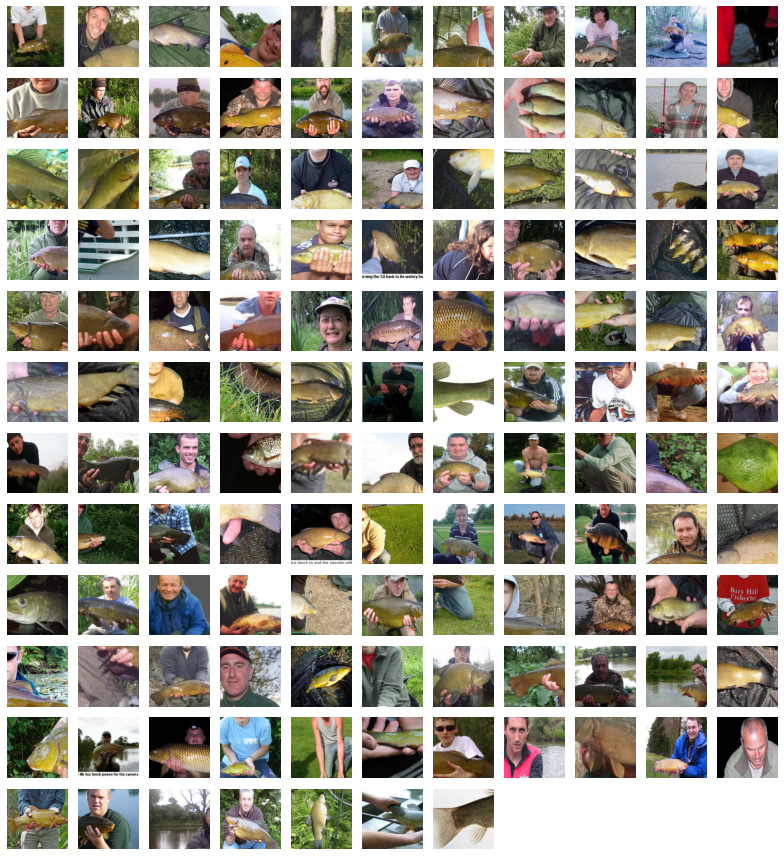

In [6]:
imgs = next(iter(train))[0]
imgs = inverse_normalize(transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]))(imgs)
imgs[imgs < 0] = 0
imgs[imgs > 1] = 1
print(imgs.shape)
datasets.visualize_images(imgs)